In [1]:
import numpy as np 
import pandas as pd 

## Data Loading & Inspecting

In [2]:
df = pd.read_csv('/kaggle/input/diet-recommendations-dataset/diet_recommendations_dataset.csv')

In [3]:
df

,Patient_ID,Age,Gender,Weight_kg,Height_cm,BMI,Disease_Type,Severity,Physical_Activity_Level,Daily_Caloric_Intake,Cholesterol_mg/dL,Blood_Pressure_mmHg,Glucose_mg/dL,Dietary_Restrictions,Allergies,Preferred_Cuisine,Weekly_Exercise_Hours,Adherence_to_Diet_Plan,Dietary_Nutrient_Imbalance_Score,Diet_Recommendation
0,P0001,56,Male,58.4,160,22.8,Obesity,Moderate,Moderate,3079,173.3,133,116.3,NaN,Peanuts,Mexican,3.1,96.6,3.1,Balanced
1,P0002,69,Male,101.2,169,35.4,Diabetes,Mild,Moderate,3032,199.2,120,137.1,NaN,Peanuts,Chinese,4.5,63.2,0.6,Low_Carb
2,P0003,46,Female,63.5,173,21.2,Hypertension,Mild,Sedentary,1737,181.0,121,109.6,NaN,Peanuts,Chinese,3.8,57.5,4.6,Low_Sodium
3,P0004,32,Male,58.1,164,21.6,NaN,Mild,Moderate,2657,168.2,144,159.4,NaN,NaN,Mexican,4.3,54.5,0.4,Balanced
4,P0005,60,Male,79.5,197,20.5,Diabetes,Moderate,Sedentary,3496,200.4,172,182.3,Low_Sugar,NaN,Italian,9.8,78.2,4.7,Low_Carb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P0996,18,Male,72.1,160,28.2,Obesity,Moderate,Active,2639,152.6,166,125.1,Low_Sugar,NaN,Mexican,4.4,55.0,3.6,Balanced
996,P0997,35,Female,104.0,171,35.6,Hypertension,Moderate,Moderate,1661,172.2,126,78.6,Low_Sodium,NaN,Chinese,7.3,88.8,2.9,Low_Sodium
997,P0998,49,Female,56.0,182,16.9,Obesity,Severe,Moderate,3102,228.0,148,70.2,Low_Sugar,NaN,Indian,8.9,68.6,4.8,Balanced
998,P0999,64,Male,66.6,185,19.5,Diabetes,Severe,Active,3235,170.1,177,138.0,Low_Sugar,Gluten,Indian,6.7,52.0,0.1,Low_Carb


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Patient_ID                        1000 non-null   object 
 1   Age                               1000 non-null   int64  
 2   Gender                            1000 non-null   object 
 3   Weight_kg                         1000 non-null   float64
 4   Height_cm                         1000 non-null   int64  
 5   BMI                               1000 non-null   float64
 6   Disease_Type                      796 non-null    object 
 7   Severity                          1000 non-null   object 
 8   Physical_Activity_Level           1000 non-null   object 
 9   Daily_Caloric_Intake              1000 non-null   int64  
 10  Cholesterol_mg/dL                 1000 non-null   float64
 11  Blood_Pressure_mmHg               1000 non-null   int64  
 12  Glucose

In [5]:
# Remove duplicate rows
df = df.drop_duplicates()

# Optional: reset index
df = df.reset_index(drop=True)

print(f"DataFrame shape after removing duplicates: {df.shape}")

DataFrame shape after removing duplicates: (1000, 20)


In [6]:
# Function to calculate daily calories
def calculate_daily_calories(age, gender, weight, height, activity_level):
    # Step 1: Calculate BMR
    if gender.lower() == "male":
        bmr = 10 * weight + 6.25 * height - 5 * age + 5
    else:  # female
        bmr = 10 * weight + 6.25 * height - 5 * age - 161

    # Step 2: Apply activity multiplier
    activity_multipliers = {
        "sedentary": 1.2,
        "moderate": 1.55,
        "active": 1.725
    }

    tdee = bmr * activity_multipliers.get(activity_level.lower(), 1.2)

    return round(tdee, 2)


# Apply function to DataFrame
df["Calculated_Calorie_Intake"] = df.apply(
    lambda row: calculate_daily_calories(
        row["Age"],
        row["Gender"],
        row["Weight_kg"],
        row["Height_cm"],
        row["Physical_Activity_Level"]
    ), axis=1
)

## Filling Missing Values

In [7]:
missing_per_column = df.isnull().sum()
print(missing_per_column)

Patient_ID                            0
Age                                   0
Gender                                0
Weight_kg                             0
Height_cm                             0
BMI                                   0
Disease_Type                        204
Severity                              0
Physical_Activity_Level               0
Daily_Caloric_Intake                  0
Cholesterol_mg/dL                     0
Blood_Pressure_mmHg                   0
Glucose_mg/dL                         0
Dietary_Restrictions                334
Allergies                           323
Preferred_Cuisine                     0
Weekly_Exercise_Hours                 0
Adherence_to_Diet_Plan                0
Dietary_Nutrient_Imbalance_Score      0
Diet_Recommendation                   0
Calculated_Calorie_Intake             0
dtype: int64


In [8]:
categorical_cols = ["Disease_Type", "Dietary_Restrictions", "Allergies"]

for col in categorical_cols: 
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

## Feature Encoding

In [9]:
import pandas as pd

categorical_cols = ['Gender', 'Disease_Type', 'Dietary_Restrictions', 'Allergies', 'Preferred_Cuisine']

# Perform one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

# Drop columns containing 'None' in their name (case-insensitive)
none_cols = [col for col in df.columns if 'none' in col.lower()]
df.drop(columns=none_cols, inplace=True)

In [10]:
# Define the order
activity_order = {"Sedentary": 0, "Moderate": 1, "Active": 2}
severity_order = {"Mild": 0, "Moderate": 1, "Severe": 2}

# Apply ordinal encoding
df["Physical_Activity_Level"] = df["Physical_Activity_Level"].map(activity_order)
df["Severity"] = df["Severity"].map(severity_order)

In [11]:
from sklearn.preprocessing import StandardScaler

numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

## Outlier Removal

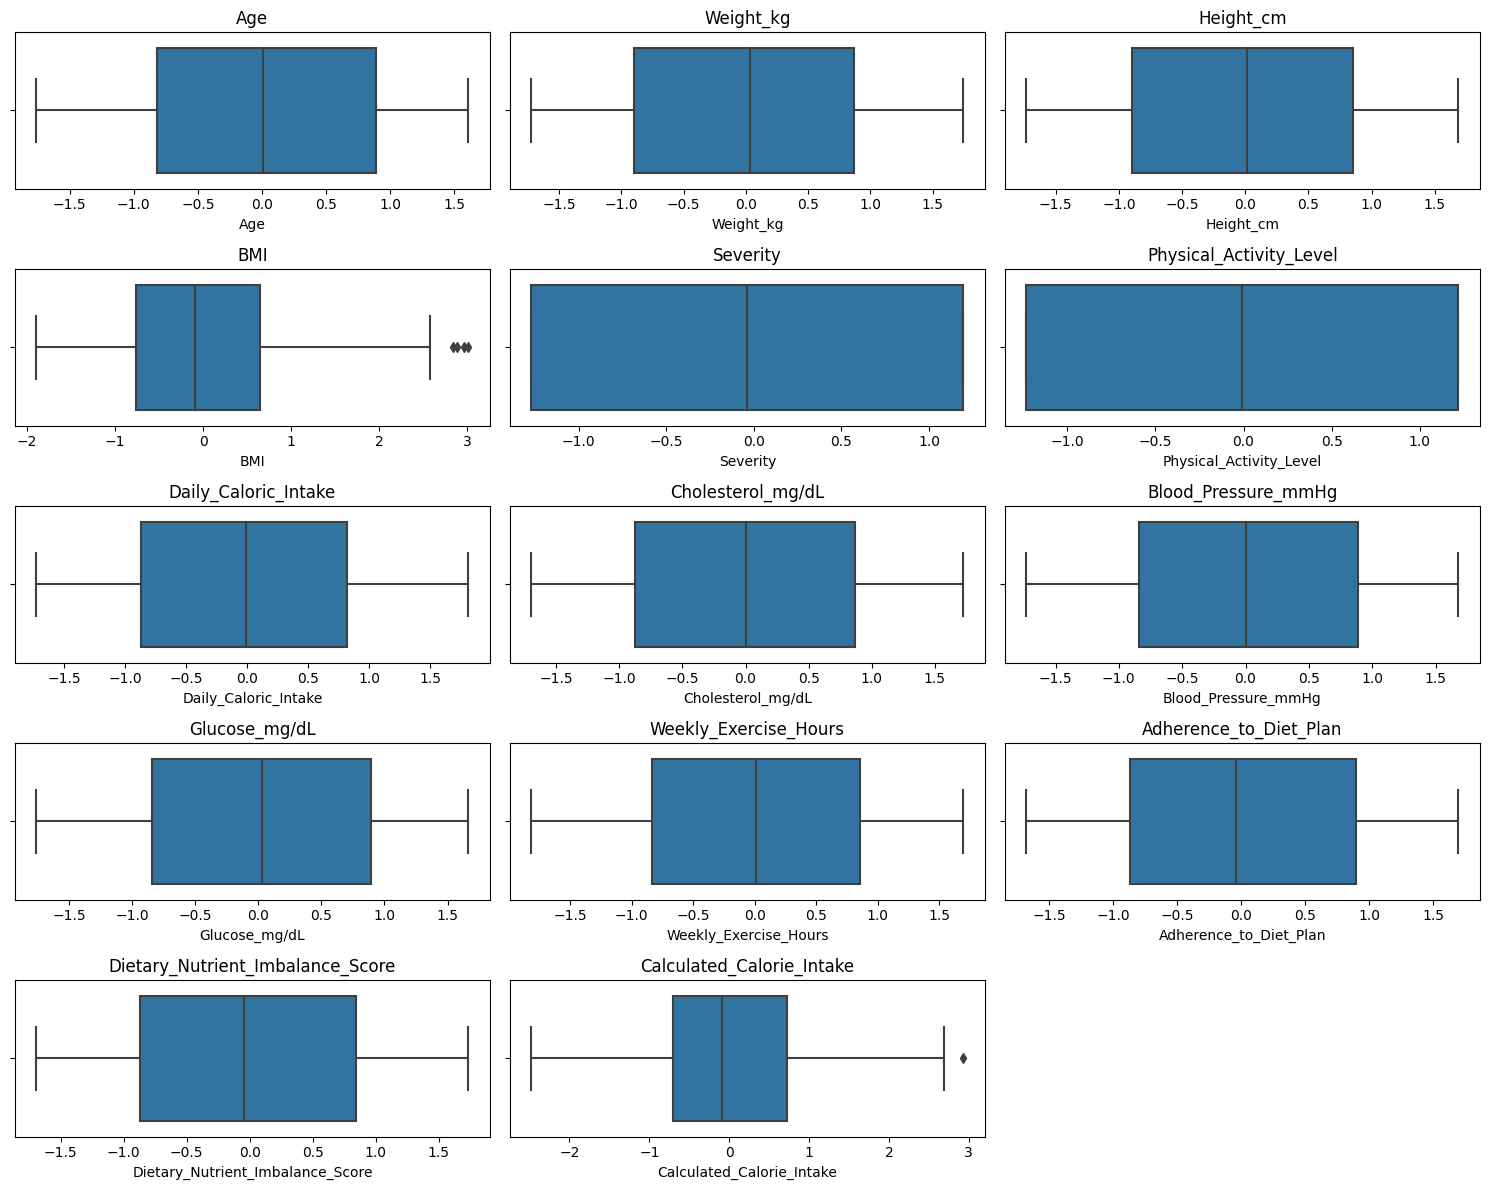

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(15,12))
rows = (len(numerical_features) + 2) // 3 
for i, col in enumerate(numerical_features, 1):
    plt.subplot(rows, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [13]:
from scipy.stats import zscore
import numpy as np

numerical_features = df.select_dtypes(include=["int64", "float64"]).columns

# Compute Z-scores
z_scores = np.abs(zscore(df[numerical_features]))

# Boolean mask for rows without outliers
mask = (z_scores <= 3).all(axis=1)

# Keep only rows that are not outliers
df = df[mask].reset_index(drop=True)

print("Shape after removing outlier(s):", df.shape)

Shape after removing outlier(s): (999, 29)


In [14]:
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns

# Calculate Q1, Q3, and IQR
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Boolean mask for rows within the 4*IQR range
mask = ~((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)

# Keep only rows that are not outliers
df = df[mask].reset_index(drop=True)

print("Shape after removing IQR outliers:", df.shape)

Shape after removing IQR outliers: (995, 29)


## Correlation Analysis

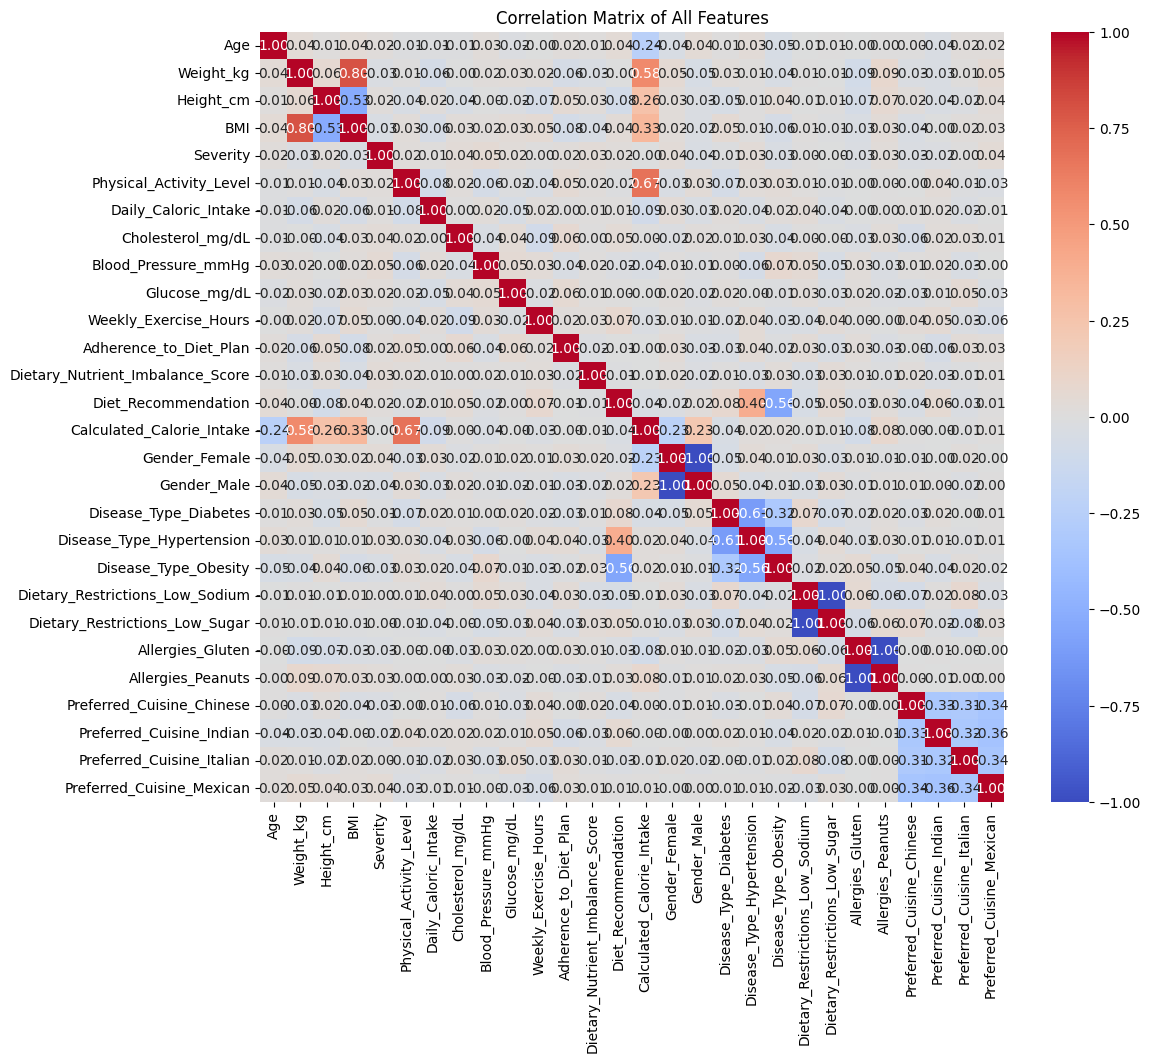

,Age,Weight_kg,Height_cm,BMI,Severity,Physical_Activity_Level,Daily_Caloric_Intake,Cholesterol_mg/dL,Blood_Pressure_mmHg,Glucose_mg/dL,...,Disease_Type_Hypertension,Disease_Type_Obesity,Dietary_Restrictions_Low_Sodium,Dietary_Restrictions_Low_Sugar,Allergies_Gluten,Allergies_Peanuts,Preferred_Cuisine_Chinese,Preferred_Cuisine_Indian,Preferred_Cuisine_Italian,Preferred_Cuisine_Mexican
Age,1.000000,0.040952,0.007828,0.039679,0.022983,-0.012748,-0.009295,-0.013709,0.027712,-0.019486,...,0.032712,-0.047457,-0.005846,0.005846,-0.003609,0.003609,0.001145,-0.038237,0.019766,0.017500
Weight_kg,0.040952,1.000000,0.062804,0.803589,-0.028562,0.007276,-0.063805,-0.000374,0.022313,0.027060,...,0.013510,-0.042815,0.007763,-0.007763,-0.085150,0.085150,-0.027569,-0.033611,0.008532,0.050990
Height_cm,0.007828,0.062804,1.000000,-0.525620,0.022019,-0.044709,0.021198,-0.043565,-0.000306,-0.023228,...,0.007491,0.041867,-0.007300,0.007300,-0.066237,0.066237,0.019307,-0.037951,-0.018846,0.036396
BMI,0.039679,0.803589,-0.525620,1.000000,-0.032331,0.031208,-0.057481,0.025621,0.019800,0.032685,...,0.007491,-0.059286,0.007979,-0.007979,-0.034039,0.034039,-0.036970,-0.004835,0.015674,0.025152
Severity,0.022983,-0.028562,0.022019,-0.032331,1.000000,0.022736,0.007835,0.035309,0.049797,0.023517,...,0.034469,-0.032463,0.002170,-0.002170,-0.028118,0.028118,-0.027308,-0.016746,0.002358,0.040136
Physical_Activity_Level,-0.012748,0.007276,-0.044709,0.031208,0.022736,1.000000,-0.078199,0.016112,-0.063284,-0.015371,...,0.029542,0.034306,0.012292,-0.012292,-0.003496,0.003496,-0.001380,0.038233,-0.010125,-0.026384
Daily_Caloric_Intake,-0.009295,-0.063805,0.021198,-0.057481,0.007835,-0.078199,1.000000,0.004435,0.023781,-0.048599,...,-0.036049,0.023135,0.035276,-0.035276,-0.004370,0.004370,0.010013,0.020088,-0.024115,-0.006338
Cholesterol_mg/dL,-0.013709,-0.000374,-0.043565,0.025621,0.035309,0.016112,0.004435,1.000000,-0.035082,0.039196,...,0.027555,-0.043104,0.004678,-0.004678,-0.025786,0.025786,-0.061446,0.023595,0.030282,0.006972
Blood_Pressure_mmHg,0.027712,0.022313,-0.000306,0.019800,0.049797,-0.063284,0.023781,-0.035082,1.000000,0.047456,...,-0.063756,0.072719,0.049515,-0.049515,0.029434,-0.029434,0.013093,0.019598,-0.032398,-0.000968
Glucose_mg/dL,-0.019486,0.027060,-0.023228,0.032685,0.023517,-0.015371,-0.048599,0.039196,0.047456,1.000000,...,-0.003120,-0.013236,0.025342,-0.025342,0.022070,-0.022070,-0.028279,0.005707,0.049877,-0.025739


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Make a copy
df_corr = df.copy()

# Encode target if it is not numeric
if df_corr['Diet_Recommendation'].dtype == 'object' or str(df_corr['Diet_Recommendation'].dtype).startswith('category'):
    le = LabelEncoder()
    df_corr['Diet_Recommendation'] = le.fit_transform(df_corr['Diet_Recommendation'])


# Drop non-numeric columns like Patient_ID
df_corr = df_corr.drop(columns=['Patient_ID'])

# Compute full correlation matrix
corr_matrix = df_corr.corr()

# Plot heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of All Features")
plt.show()

corr_matrix

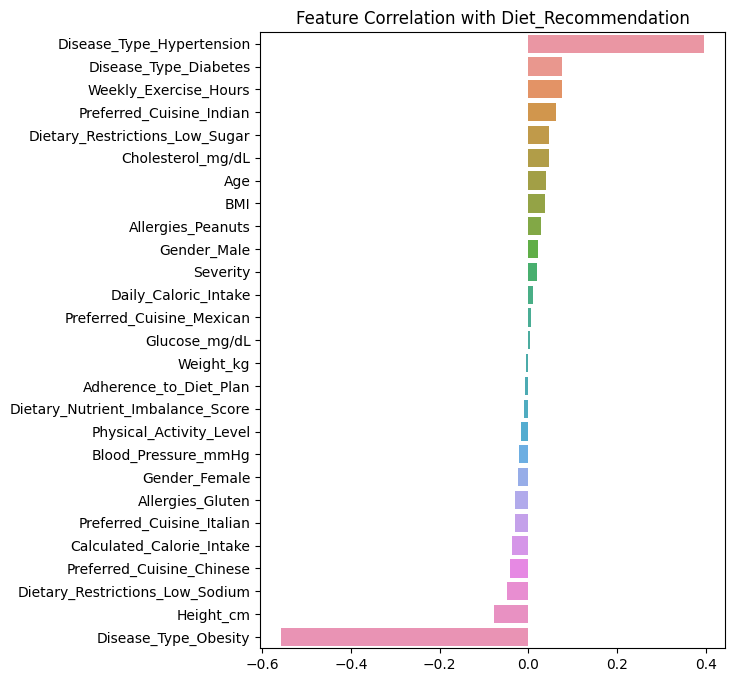

Disease_Type_Hypertension           0.396044
Disease_Type_Diabetes               0.076383
Weekly_Exercise_Hours               0.074973
Preferred_Cuisine_Indian            0.062071
Dietary_Restrictions_Low_Sugar      0.047621
Cholesterol_mg/dL                   0.045608
Age                                 0.040121
BMI                                 0.037748
Allergies_Peanuts                   0.028953
Gender_Male                         0.022613
Severity                            0.019488
Daily_Caloric_Intake                0.009439
Preferred_Cuisine_Mexican           0.006036
Glucose_mg/dL                       0.002972
Weight_kg                          -0.004908
Adherence_to_Diet_Plan             -0.007309
Dietary_Nutrient_Imbalance_Score   -0.008658
Physical_Activity_Level            -0.015573
Blood_Pressure_mmHg                -0.020515
Gender_Female                      -0.022613
Allergies_Gluten                   -0.028953
Preferred_Cuisine_Italian          -0.029159
Calculated

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

df_corr = df.copy()

if df_corr['Diet_Recommendation'].dtype == 'object' or str(df_corr['Diet_Recommendation'].dtype).startswith('category'):
    le = LabelEncoder()
    df_corr['Diet_Recommendation'] = le.fit_transform(df_corr['Diet_Recommendation'])

df_corr_numeric = df_corr.drop(columns=['Patient_ID'])

target_corr = df_corr_numeric.corr()['Diet_Recommendation'].drop('Diet_Recommendation').sort_values(ascending=False)

plt.figure(figsize=(6,8))
sns.barplot(x=target_corr.values, y=target_corr.index)
plt.title("Feature Correlation with Diet_Recommendation")
plt.show()

target_corr

## Feature Selection

Disease_Type_Diabetes               0.266416
Disease_Type_Hypertension           0.167904
Disease_Type_Obesity                0.130023
Weekly_Exercise_Hours               0.035203
Daily_Caloric_Intake                0.035080
BMI                                 0.035043
Weight_kg                           0.033473
Height_cm                           0.031549
Cholesterol_mg/dL                   0.031167
Adherence_to_Diet_Plan              0.030280
Glucose_mg/dL                       0.030186
Calculated_Calorie_Intake           0.029610
Age                                 0.029323
Blood_Pressure_mmHg                 0.027939
Dietary_Nutrient_Imbalance_Score    0.027100
Severity                            0.009260
Physical_Activity_Level             0.006678
Preferred_Cuisine_Indian            0.005038
Dietary_Restrictions_Low_Sodium     0.004889
Preferred_Cuisine_Italian           0.004684
Dietary_Restrictions_Low_Sugar      0.004457
Allergies_Gluten                    0.004269
Preferred_

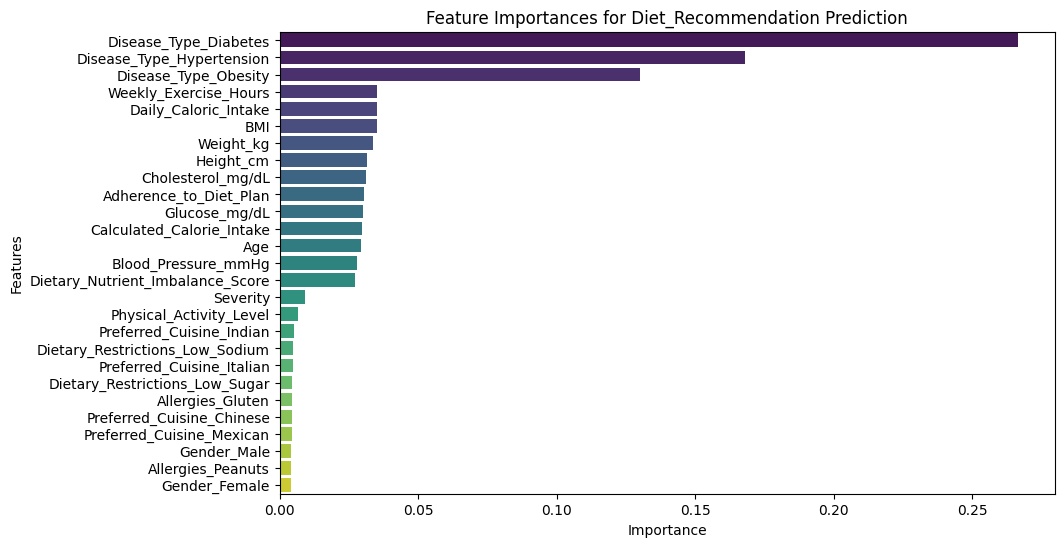

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    if col != 'Diet_Recommendation':  # leave target for separate encoding
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

target_le = LabelEncoder()
y = target_le.fit_transform(df_encoded['Diet_Recommendation'])
X = df_encoded.drop(columns=['Diet_Recommendation', 'Patient_ID'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances)

plt.figure(figsize=(10,6))
sns.barplot(x=importances.values, y=importances.index, palette="viridis")
plt.title("Feature Importances for Diet_Recommendation Prediction")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [18]:
target = "Diet_Recommendation"
X = df.drop(columns=[target, "Patient_ID" , 'Daily_Caloric_Intake', 'Adherence_to_Diet_Plan', 'Dietary_Nutrient_Imbalance_Score']) 
y = df[target]

In [19]:
X.shape

(995, 24)

In [20]:
X

,Age,Weight_kg,Height_cm,BMI,Severity,Physical_Activity_Level,Cholesterol_mg/dL,Blood_Pressure_mmHg,Glucose_mg/dL,Weekly_Exercise_Hours,...,Disease_Type_Hypertension,Disease_Type_Obesity,Dietary_Restrictions_Low_Sodium,Dietary_Restrictions_Low_Sugar,Allergies_Gluten,Allergies_Peanuts,Preferred_Cuisine_Chinese,Preferred_Cuisine_Indian,Preferred_Cuisine_Italian,Preferred_Cuisine_Mexican
0,0.339295,-1.305026,-1.034230,-0.670921,-0.037009,-0.006132,-0.908891,-0.592669,-0.542454,-0.725786,...,False,True,True,False,False,True,False,False,False,True
1,1.057320,0.826653,-0.406028,0.897001,-1.270637,-0.006132,-0.017818,-1.235101,0.006129,-0.233966,...,False,False,True,False,False,True,True,False,False,False
2,-0.213033,-1.051017,-0.126827,-0.870022,-1.270637,-1.232433,-0.643978,-1.185683,-0.719161,-0.479876,...,True,False,True,False,False,True,True,False,False,False
3,-0.986291,-1.319967,-0.755029,-0.820247,-1.270637,-0.006132,-1.084354,-0.049072,0.594274,-0.304226,...,True,False,True,False,True,False,False,False,False,True
4,0.560226,-0.254128,1.548378,-0.957129,-0.037009,-1.232433,0.023467,1.334629,1.198243,1.627924,...,False,False,False,True,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,-1.759549,-0.622689,-1.034230,0.001045,-0.037009,1.220170,-1.621062,1.038122,-0.310361,-0.269096,...,False,True,False,True,True,False,False,False,False,True
991,-0.820593,0.966109,-0.266427,0.921888,-0.037009,-0.006132,-0.946736,-0.938594,-1.536761,0.749674,...,True,False,True,False,True,False,True,False,False,False
992,-0.047334,-1.424559,0.501375,-1.405107,1.196619,-0.006132,0.973028,0.148600,-1.758304,1.311754,...,False,True,False,True,True,False,False,True,False,False
993,0.781156,-0.896620,0.710776,-1.081567,1.196619,1.220170,-1.018985,1.581718,0.029866,0.538894,...,False,False,False,True,True,False,False,True,False,False


## Model Building

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [22]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [23]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 796 entries, 541 to 696
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              796 non-null    float64
 1   Weight_kg                        796 non-null    float64
 2   Height_cm                        796 non-null    float64
 3   BMI                              796 non-null    float64
 4   Severity                         796 non-null    float64
 5   Physical_Activity_Level          796 non-null    float64
 6   Cholesterol_mg/dL                796 non-null    float64
 7   Blood_Pressure_mmHg              796 non-null    float64
 8   Glucose_mg/dL                    796 non-null    float64
 9   Weekly_Exercise_Hours            796 non-null    float64
 10  Calculated_Calorie_Intake        796 non-null    float64
 11  Gender_Female                    796 non-null    bool   
 12  Gender_Male              

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(
    n_estimators=1020,    
    max_depth=11,
    min_samples_split=2,   
    random_state=42
)

rf_model.fit(X_train, y_train_encoded)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Random Forest Accuracy:", accuracy)

Random Forest Accuracy: 0.7989949748743719


In [25]:
import joblib

joblib.dump(rf_model, 'diet_model.joblib')

ensemble_loaded = joblib.load('diet_model.joblib')
y_pred_loaded = ensemble_loaded.predict(X_test)

## Getting Predictions


In [26]:
loaded_model = joblib.load('diet_model.joblib')

In [27]:
def calculate_bmi(weight_kg, height_cm):
    height_m = height_cm / 100
    bmi = weight_kg / (height_m ** 2)
    return round(bmi, 2)

In [28]:
def calculate_daily_calories(age, gender, weight, height, activity_level):
    # Map gender to string if it's numeric
    gender_str = "male" if gender == 1 else "female"
    
    # Step 1: Calculate BMR
    if gender_str == "male":
        bmr = 10 * weight + 6.25 * height - 5 * age + 5
    else:
        bmr = 10 * weight + 6.25 * height - 5 * age - 161

    # Step 2: Activity multiplier
    activity_multipliers = {
        0: 1.2,   # sedentary
        1: 1.55,  # moderate
        2: 1.725  # active
    }

    tdee = bmr * activity_multipliers.get(activity_level, 1.2)
    return round(tdee, 2)

In [29]:
import pandas as pd

# Example new sample
new_sample = {
    'Age': 23,
    'Gender': 0, 
    'Weight_kg': 43,
    'Height_cm': 165,
    'Disease_Type': 1,
    'Severity': 0,
    'Physical_Activity_Level': 1,  
    'Cholesterol_mg/dL': 180,
    'Blood_Pressure_mmHg': 120,
    'Glucose_mg/dL': 90,
    'Dietary_Restrictions': 0,
    'Allergies': 0,
    'Preferred_Cuisine': 2,
    'Weekly_Exercise_Hours': 20
}

# Calculate BMI
new_sample['BMI'] = calculate_bmi(new_sample['Weight_kg'], new_sample['Height_cm'])

# Calculate Calories
new_sample['Calculated_Calorie_Intake'] = calculate_daily_calories(
    new_sample['Age'],
    new_sample['Gender'],
    new_sample['Weight_kg'],
    new_sample['Height_cm'],
    new_sample['Physical_Activity_Level']
)

In [30]:
import pandas as pd

# Reference columns (from your encoded dataset)
encoded_columns = [
    'Age', 'Weight_kg', 'Height_cm', 'BMI', 'Severity', 'Physical_Activity_Level',
    'Cholesterol_mg/dL', 'Blood_Pressure_mmHg', 'Glucose_mg/dL',
    'Weekly_Exercise_Hours', 'Calculated_Calorie_Intake',
    'Gender_Female', 'Gender_Male',
    'Disease_Type_Diabetes', 'Disease_Type_Hypertension', 'Disease_Type_Obesity',
    'Dietary_Restrictions_Low_Sodium', 'Dietary_Restrictions_Low_Sugar',
    'Allergies_Gluten', 'Allergies_Peanuts',
    'Preferred_Cuisine_Chinese', 'Preferred_Cuisine_Indian',
    'Preferred_Cuisine_Italian', 'Preferred_Cuisine_Mexican'
]

# Mappings (added "None" = 0 for safety)
gender_map = {0: 'Female', 1: 'Male'}
disease_map = {0: 'None', 1: 'Diabetes', 2: 'Hypertension', 3: 'Obesity'}
diet_map = {0: 'None', 1: 'Low_Sodium', 2: 'Low_Sugar'}
allergy_map = {0: 'None', 1: 'Gluten', 2: 'Peanuts'}
cuisine_map = {0: 'None', 1: 'Chinese', 2: 'Indian', 3: 'Italian', 4: 'Mexican'}

def encode_sample(new_sample):
    # Initialize with all zeros
    encoded_sample = {col: 0 for col in encoded_columns}
    
    # Fill numeric values
    for col in [
        'Age', 'Weight_kg', 'Height_cm', 'BMI', 'Severity', 'Physical_Activity_Level',
        'Cholesterol_mg/dL', 'Blood_Pressure_mmHg', 'Glucose_mg/dL',
        'Weekly_Exercise_Hours', 'Calculated_Calorie_Intake'
    ]:
        encoded_sample[col] = new_sample[col]
    
    # One-hot encode Gender (always present, no "None")
    encoded_sample[f"Gender_{gender_map[new_sample['Gender']]}"] = 1
    
    # Disease Type
    disease_name = disease_map.get(new_sample['Disease_Type'], 'None')
    if disease_name != "None":
        encoded_sample[f"Disease_Type_{disease_name}"] = 1
    
    # Dietary Restrictions
    diet_name = diet_map.get(new_sample['Dietary_Restrictions'], 'None')
    if diet_name != "None":
        encoded_sample[f"Dietary_Restrictions_{diet_name}"] = 1
    
    # Allergies
    allergy_name = allergy_map.get(new_sample['Allergies'], 'None')
    if allergy_name != "None":
        encoded_sample[f"Allergies_{allergy_name}"] = 1
    
    # Preferred Cuisine
    cuisine_name = cuisine_map.get(new_sample['Preferred_Cuisine'], 'None')
    if cuisine_name != "None":
        encoded_sample[f"Preferred_Cuisine_{cuisine_name}"] = 1
    
    return pd.DataFrame([encoded_sample])[encoded_columns]

# Encode
final_df = encode_sample(new_sample)
print(final_df)


   Age  Weight_kg  Height_cm    BMI  Severity  Physical_Activity_Level  \
0   23         43        165  15.79         0                        1   

   Cholesterol_mg/dL  Blood_Pressure_mmHg  Glucose_mg/dL  \
0                180                  120             90   

   Weekly_Exercise_Hours  ...  Disease_Type_Hypertension  \
0                     20  ...                          0   

   Disease_Type_Obesity  Dietary_Restrictions_Low_Sodium  \
0                     0                                0   

   Dietary_Restrictions_Low_Sugar  Allergies_Gluten  Allergies_Peanuts  \
0                               0                 0                  0   

   Preferred_Cuisine_Chinese  Preferred_Cuisine_Indian  \
0                          0                         1   

   Preferred_Cuisine_Italian  Preferred_Cuisine_Mexican  
0                          0                          0  

[1 rows x 24 columns]


In [31]:
# Predict using saved ensemble model
y_pred_encoded = loaded_model.predict(final_df)

# Decode to original labels if LabelEncoder was used
y_pred = label_encoder.inverse_transform(y_pred_encoded)

print("Predicted Class:", y_pred[0])

Predicted Class: Low_Carb


In [33]:
# # =============================
# # 1. Imports
# # =============================
# import optuna
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import cross_val_score, StratifiedKFold
# from sklearn.metrics import accuracy_score
# from sklearn.preprocessing import LabelEncoder

# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier

# # =============================
# # 2. Encode target variable
# # =============================
# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_test_encoded = label_encoder.transform(y_test)

# # Use cross-validation for stable results
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # =============================
# # 3. Define Objective Functions
# # =============================

# def objective_lr(trial):
#     C = trial.suggest_float("C", 1e-4, 10.0, log=True)
#     penalty = trial.suggest_categorical("penalty", ["l2", "none"])
#     solver = "lbfgs"
#     model = LogisticRegression(C=C, penalty=penalty, solver=solver, max_iter=5000)
#     return cross_val_score(model, X_train, y_train_encoded, cv=cv, scoring="accuracy").mean()

# def objective_dt(trial):
#     max_depth = trial.suggest_int("max_depth", 2, 30)
#     min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
#     model = DecisionTreeClassifier(max_depth=max_depth,
#                                    min_samples_split=min_samples_split,
#                                    random_state=42)
#     return cross_val_score(model, X_train, y_train_encoded, cv=cv, scoring="accuracy").mean()

# def objective_rf(trial):
#     n_estimators = trial.suggest_int("n_estimators", 50, 1000)
#     max_depth = trial.suggest_int("max_depth", 2, 30)
#     min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
#     model = RandomForestClassifier(n_estimators=n_estimators,
#                                    max_depth=max_depth,
#                                    min_samples_split=min_samples_split,
#                                    random_state=42)
#     return cross_val_score(model, X_train, y_train_encoded, cv=cv, scoring="accuracy").mean()

# def objective_xgb(trial):
#     n_estimators = trial.suggest_int("n_estimators", 50, 1000)
#     max_depth = trial.suggest_int("max_depth", 2, 15)
#     learning_rate = trial.suggest_float("learning_rate", 0.01, 0.3)
#     subsample = trial.suggest_float("subsample", 0.5, 1.0)
#     model = XGBClassifier(
#         n_estimators=n_estimators,
#         max_depth=max_depth,
#         learning_rate=learning_rate,
#         subsample=subsample,
#         random_state=42,
#         use_label_encoder=False,
#         eval_metric="logloss"
#     )
#     return cross_val_score(model, X_train, y_train_encoded, cv=cv, scoring="accuracy").mean()

# def objective_lgbm(trial):
#     n_estimators = trial.suggest_int("n_estimators", 50, 1000)
#     max_depth = trial.suggest_int("max_depth", -1, 30)
#     learning_rate = trial.suggest_float("learning_rate", 0.01, 0.3)
#     num_leaves = trial.suggest_int("num_leaves", 2, 64)
#     model = LGBMClassifier(
#         n_estimators=n_estimators,
#         max_depth=max_depth,
#         learning_rate=learning_rate,
#         num_leaves=num_leaves,
#         random_state=42
#     )
#     return cross_val_score(model, X_train, y_train_encoded, cv=cv, scoring="accuracy").mean()

# def objective_cat(trial):
#     depth = trial.suggest_int("depth", 2, 10)
#     learning_rate = trial.suggest_float("learning_rate", 0.01, 0.3)
#     iterations = trial.suggest_int("iterations", 50, 1000)
#     model = CatBoostClassifier(
#         depth=depth,
#         learning_rate=learning_rate,
#         iterations=iterations,
#         verbose=0,
#         random_state=42
#     )
#     return cross_val_score(model, X_train, y_train_encoded, cv=cv, scoring="accuracy").mean()

# # =============================
# # 4. Run Optuna Studies
# # =============================

# def tune_model(objective, n_trials=30):
#     study = optuna.create_study(direction="maximize")
#     study.optimize(objective, n_trials=n_trials)
#     return study.best_params, study.best_value

# models = {
#     "Logistic Regression": objective_lr,
#     "Decision Tree": objective_dt,
#     "Random Forest": objective_rf,
#     "XGBoost": objective_xgb,
#     "LightGBM": objective_lgbm,
#     "CatBoost": objective_cat
# }

# results = {}

# for name, obj in models.items():
#     print(f"\n🔹 Tuning {name}...")
#     best_params, best_score = tune_model(obj, n_trials=30)
#     results[name] = {"best_params": best_params, "cv_accuracy": best_score}
#     print(f"✅ {name} Best CV Accuracy: {best_score:.4f}")
#     print(f"Best Params: {best_params}")

# # =============================
# # 5. Train Best Models on Full Train Set & Evaluate on Test Set
# # =============================

# def instantiate_model(name, params):
#     if name == "Logistic Regression":
#         return LogisticRegression(**params, solver="lbfgs", max_iter=5000)
#     elif name == "Decision Tree":
#         return DecisionTreeClassifier(**params, random_state=42)
#     elif name == "Random Forest":
#         return RandomForestClassifier(**params, random_state=42)
#     elif name == "XGBoost":
#         return XGBClassifier(**params, random_state=42, use_label_encoder=False, eval_metric="logloss")
#     elif name == "LightGBM":
#         return LGBMClassifier(**params, random_state=42)
#     elif name == "CatBoost":
#         return CatBoostClassifier(**params, verbose=0, random_state=42)
#     else:
#         raise ValueError("Unknown model name")

# test_results = {}

# for name, res in results.items():
#     model = instantiate_model(name, res["best_params"])
#     model.fit(X_train, y_train_encoded)

#     # Predict encoded classes
#     y_pred_encoded = model.predict(X_test)
#     # Decode back to original labels
#     y_pred = label_encoder.inverse_transform(y_pred_encoded)

#     # Compute accuracy using original labels
#     acc = accuracy_score(y_test, y_pred)
#     test_results[name] = acc
#     print(f"📊 {name} Test Accuracy: {acc:.4f}")

# # =============================
# # 6. Display Final Results
# # =============================
# final_df = pd.DataFrame.from_dict(test_results, orient='index', columns=['Test Accuracy'])
# print("\nFinal Test Accuracies:")
# print(final_df)

In [32]:
# from sklearn.metrics import accuracy_score
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# import xgboost as xgb
# import lightgbm as lgb
# from catboost import CatBoostClassifier

# from sklearn.preprocessing import LabelEncoder

# # Encode target labels
# le = LabelEncoder()
# y_train_enc = le.fit_transform(y_train)
# y_test_enc = le.transform(y_test)

# # 1️⃣ Decision Tree
# dt = DecisionTreeClassifier(max_depth=2, min_samples_split=16, random_state=42)
# dt.fit(X_train, y_train)
# dt_test_acc = accuracy_score(y_test, dt.predict(X_test))
# print("✅ Decision Tree Best CV Accuracy: 0.8040")
# print("📊 Decision Tree Test Accuracy:", dt_test_acc)

# # 2️⃣ Logistic Regression
# lr = LogisticRegression(C=0.042788625597878584, penalty='l2', max_iter=1000, solver='liblinear')
# lr.fit(X_train, y_train)
# lr_test_acc = accuracy_score(y_test, lr.predict(X_test))
# print("✅ Logistic Regression Best CV Accuracy: 0.7877")
# print("📊 Logistic Regression Test Accuracy:", lr_test_acc)

# # 3️⃣ Random Forest
# rf = RandomForestClassifier(n_estimators=1020, max_depth=11, min_samples_split=2, random_state=42)
# rf.fit(X_train, y_train)
# rf_test_acc = accuracy_score(y_test, rf.predict(X_test))
# print("✅ Random Forest Best CV Accuracy: 0.7890")
# print("📊 Random Forest Test Accuracy:", rf_test_acc)

# # 4️⃣ XGBoost
# xgb_model = xgb.XGBClassifier(
#     n_estimators=620, max_depth=10, learning_rate=0.29933919085538013, 
#     subsample=0.7807774109846545, use_label_encoder=False, eval_metric='mlogloss', random_state=42
# )
# xgb_model.fit(X_train, y_train)
# xgb_test_acc = accuracy_score(y_test, xgb_model.predict(X_test))
# print("XGBoost Best CV Accuracy: 0.7740")
# print("📊 XGBoost Test Accuracy:", xgb_test_acc)

# # 5️⃣ LightGBM
# lgb_model = lgb.LGBMClassifier(
#     n_estimators=914, max_depth=24, learning_rate=0.17465919051492365, num_leaves=15, random_state=42
# )
# lgb_model.fit(X_train, y_train)
# lgb_test_acc = accuracy_score(y_test, lgb_model.predict(X_test))
# print("✅ LightGBM Best CV Accuracy: 0.7714")
# print("📊 LightGBM Test Accuracy:", lgb_test_acc)

# # 6️⃣ CatBoost
# cat_model = CatBoostClassifier(
#     depth=2, learning_rate=0.24914710517787012, iterations=70, verbose=0, random_state=42
# )
# cat_model.fit(X_train, y_train)
# cat_test_acc = accuracy_score(y_test, cat_model.predict(X_test))
# print("✅ CatBoost Best CV Accuracy: 0.7877")
# print("📊 CatBoost Test Accuracy: 0.7437")
